# VGG with CAM
In this file, we implement the VGG + class activation mapping on the UC colonoscopy data. 

In [6]:
%matplotlib inline

In [1]:
import os
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Lambda
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model

Using TensorFlow backend.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/UC_colonoscopy/"
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [4]:
batch_size=32

In [12]:
gen = ImageDataGenerator(data_format='channels_first')
train_gen = gen.flow_from_directory(path+'categorized/train/', target_size=(224, 224), class_mode='categorical', shuffle=True,
                                    batch_size=batch_size)
test_gen = gen.flow_from_directory(path+'categorized/validate/', target_size=(224, 224), class_mode='categorical', shuffle=False,
                                   batch_size=batch_size)
show_gen = ImageDataGenerator().flow_from_directory(path+'categorized/train/', target_size=(224, 224), class_mode='categorical', shuffle=True,
                                    batch_size=8)

Found 5939 images belonging to 4 classes.
Found 1494 images belonging to 4 classes.
Found 5939 images belonging to 4 classes.


In [13]:
show_batch, show_label = next(show_gen)

In [15]:
show_label

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]], dtype=float32)

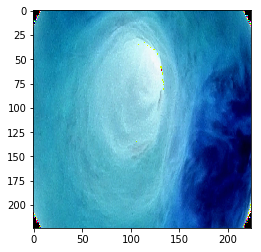

In [18]:
plt.imshow(show_batch[4])

In [5]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

model.pop() 
for layer in model.layers: layer.trainable=False

model.add(Dense(4, activation='softmax'))
opt = RMSprop(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 3, 224, 224)       0         
_________________________________________________________________
zero_padding2d_27 (ZeroPaddi (None, 3, 226, 226)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 224, 224)      1792      
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 64, 226, 226)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 224, 224)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 112, 112)      0         
_________________________________________________________________
zero_padding2d_29 (ZeroPaddi (None, 64, 114, 114)      0         
__________

In [9]:
model.optimizer.lr = 0.0001

In [10]:
model.fit_generator(train_gen, steps_per_epoch=train_gen.n // batch_size, epochs=1, validation_data=test_gen, 
                    validation_steps = test_gen.n // batch_size)

Epoch 1/1
185/185 [==============================] - 167s 902ms/step - loss: 4.2783 - acc: 0.7346 - val_loss: 3.9200 - val_acc: 0.7568


In [11]:
y_pred = model.predict_generator(test_gen)

In [20]:
y_pred_class = y_pred.argmax(axis=1)

In [23]:
sum(y_pred_class == 0)

1494